In [39]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import technical_analysis.backtest_kz as bt
from technical_analysis.indicators import Indicators 
from data_pipelines.data_manipulation import DataManipulation
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

SYMBOL = 'BTC-USD'
scale = 1
range_list = [5,6,7,8,10,12,14,15,20]
range_list = [i*scale for i in range_list]
period = '1y'
interval = '1h'
start_date = ''
end_data = ''
source = 'yahoo'

data = DataManipulation(SYMBOL, source, range_list, period=period, interval=interval, scale=scale, prefix_path='..', saved_to_csv=True)

[*********************100%***********************]  1 of 1 completed
Start TA-LIB module
created indicators columns with TA-LIB


In [40]:
df = data.df.copy()
df.tail()

,ad,adj_close,adx_10,adx_12,adx_14,adx_15,adx_20,adx_5,adx_6,adx_7,...,wma_12,wma_14,wma_15,wma_20,wma_5,wma_6,wma_7,wma_8,daily_return,feature_label
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-11-21 15:00:00+00:00,333600142441.6199,16131.8242,37.9721,39.8638,39.4621,38.7731,33.4573,32.0914,32.7542,33.8850,...,16118.5094,16116.0330,16115.7544,16128.2219,16139.7387,16136.2194,16133.2641,16128.4191,-0.0026,0.0000
2022-11-21 16:00:00+00:00,333520245075.6568,16038.9658,37.6010,39.4379,39.1585,38.5468,33.5605,33.7011,33.3906,34.0313,...,16106.5784,16107.1511,16106.3996,16115.8569,16110.0074,16110.9464,16111.9060,16112.3089,-0.0058,0.0000
2022-11-21 17:00:00+00:00,333374536571.7365,16027.5879,37.2669,39.0476,38.8765,38.3356,33.6585,34.9889,33.9210,34.1567,...,16094.2633,16096.5383,16097.2057,16104.7341,16079.4704,16086.4589,16090.1068,16093.1686,-0.0007,0.0000
2022-11-21 18:00:00+00:00,333204337351.1516,15987.5391,37.5751,39.1190,38.9362,38.4216,33.9215,38.1846,35.9562,35.4682,...,16078.1040,16080.9267,16082.9134,16090.9780,16040.1222,16053.2043,16061.7290,16067.3140,-0.0025,0.0000
2022-11-21 19:00:00+00:00,331611292359.1516,15696.0068,39.9954,40.7842,40.2389,39.6181,34.8799,46.1542,42.1086,40.2472,...,16018.7778,16027.9490,16032.8117,16050.9720,15914.8473,15941.8035,15963.9050,15980.4574,-0.0182,1.0000


In [41]:
ext_df = data.extract_features()

In [42]:
ext_df.tail()

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,log_return,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,daily_return,feature_label
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-11-21 14:00:00+00:00,1,0,1,1,0,0,0,0,0.6667,0.6667,...,0.0010,1,0,1,1,0,0,0,0.0010,0.0000
2022-11-21 15:00:00+00:00,0,0,1,1,0,0,0,0,0.6667,0.6667,...,-0.0026,1,1,0,1,1,0,0,-0.0026,0.0000
2022-11-21 16:00:00+00:00,0,0,1,1,0,0,1,0,0.6667,0.6667,...,-0.0058,1,1,1,0,1,1,0,-0.0058,0.0000
2022-11-21 17:00:00+00:00,0,0,0,1,0,0,1,0,0.6667,0.6667,...,-0.0007,0,1,1,1,0,1,1,-0.0007,0.0000
2022-11-21 18:00:00+00:00,0,0,0,1,0,0,1,0,0.6667,0.6667,...,-0.0025,0,0,1,1,1,0,1,-0.0025,0.0000


In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
X = ext_df.copy()
X.reset_index(inplace=True)
X.drop(columns=['Datetime', 'feature_label'], axis=1, inplace=True)
Y = ext_df.feature_label.copy()

In [45]:
Y = Y.reset_index()

In [46]:
Y.drop(columns=['Datetime'], axis=1, inplace=True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=46)

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
pred = model.predict(X_test)
pred = pred > 0.5
pred = pred.astype(int)
accuracy_score(pred, y_test)

0.503476245654693

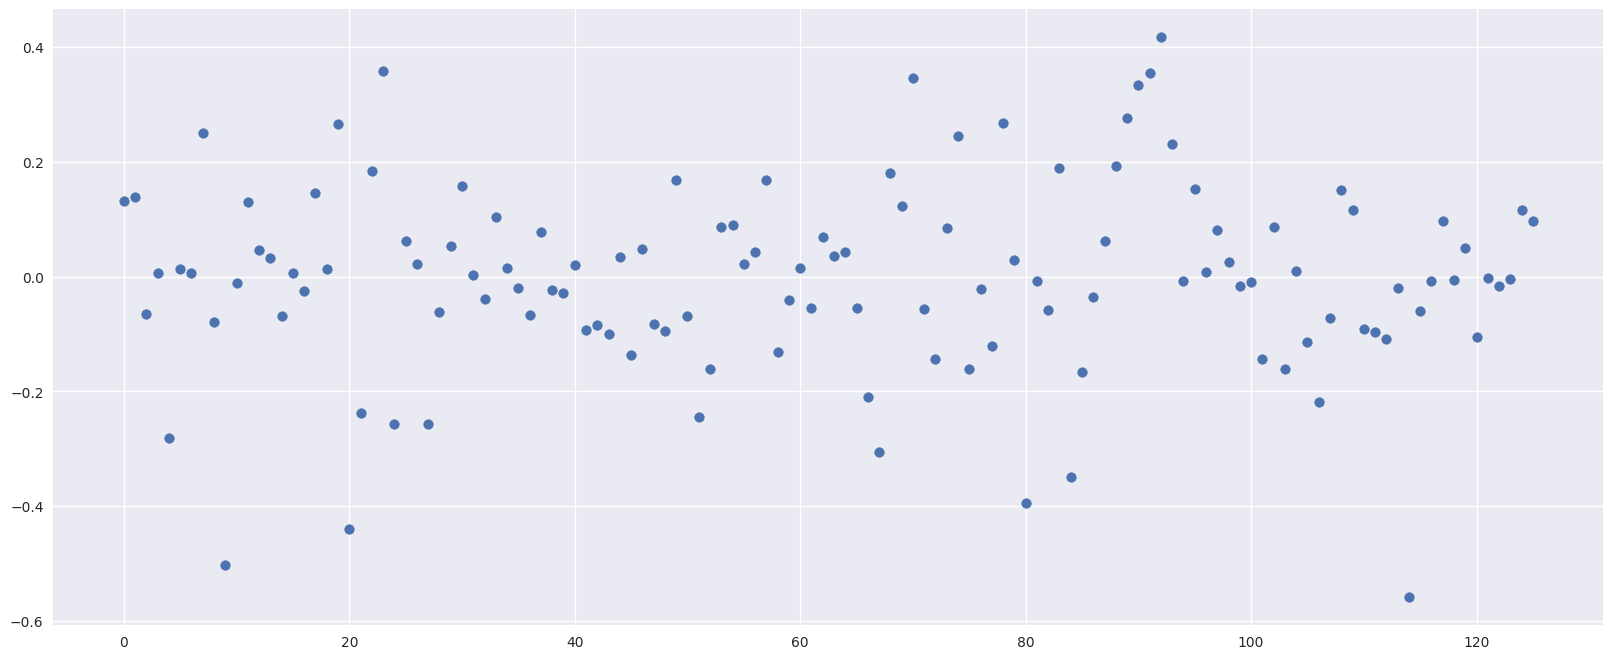

In [50]:
import matplotlib.pyplot as plt
import numpy as np
weigths = model.coef_
fig, ax = plt.subplots(1,1, figsize=(20,8))
plt.scatter(np.arange(0,len(np.column_stack(weigths).ravel())), np.column_stack(weigths).ravel())

In [51]:
np.column_stack(weigths).ravel().size

126

In [52]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [53]:
X_train.shape

(6903, 126)

In [54]:
model = Sequential(
    [               
        tf.keras.Input(shape=(X_train.shape[1],)),
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=16, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ], name = "my_model" 
)   

In [55]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               16256     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 27,137
Trainable params: 27,137
Non-trainable params: 0
_________________________________________________________________


In [56]:
[layer1, layer2, layer3, *a] = model.layers

In [57]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (126, 128), b1 shape = (128,)
W2 shape = (128, 64), b2 shape = (64,)
W3 shape = (64, 32), b3 shape = (32,)


In [58]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train, y_train,
    epochs=40
)

Epoch 1/40
216/216 [==============================] - 2s 9ms/step - loss: 0.6936
Epoch 2/40
216/216 [==============================] - 2s 9ms/step - loss: 0.6916
Epoch 3/40
216/216 [==============================] - 2s 9ms/step - loss: 0.6895
Epoch 4/40
216/216 [==============================] - 2s 9ms/step - loss: 0.6891
Epoch 5/40
216/216 [==============================] - 2s 9ms/step - loss: 0.6885
Epoch 6/40
216/216 [==============================] - 2s 9ms/step - loss: 0.6858
Epoch 7/40
216/216 [==============================] - 2s 9ms/step - loss: 0.6839
Epoch 8/40
216/216 [==============================] - 2s 9ms/step - loss: 0.6822
Epoch 9/40
216/216 [==============================] - 2s 9ms/step - loss: 0.6784
Epoch 10/40
216/216 [==============================] - 2s 8ms/step - loss: 0.6753
Epoch 11/40
216/216 [==============================] - 2s 8ms/step - loss: 0.6689
Epoch 12/40
216/216 [==============================] - 2s 8ms/step - loss: 0.6597
Epoch 13/40
216/216 [====

In [59]:
pred = model.predict(X_test)

54/54 [==============================] - 0s 3ms/step


In [60]:
pred = (pred >= 0.5).astype(int)

In [61]:
pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [62]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
14/14 [==============================] - 0s 6ms/step - loss: 2.0752
test loss, test acc: 2.075246572494507


In [63]:
print(confusion_matrix(y_test, pred))

[[469 361]
 [517 379]]


In [64]:
accuracy_score(y_test, pred)

0.49130938586326767

In [65]:
pd.DataFrame(pred).value_counts()

0    986
1    740
dtype: int64

In [66]:
ext_df['kz_score'] = ext_df.sum(axis = 1)

<AxesSubplot:xlabel='Datetime'>

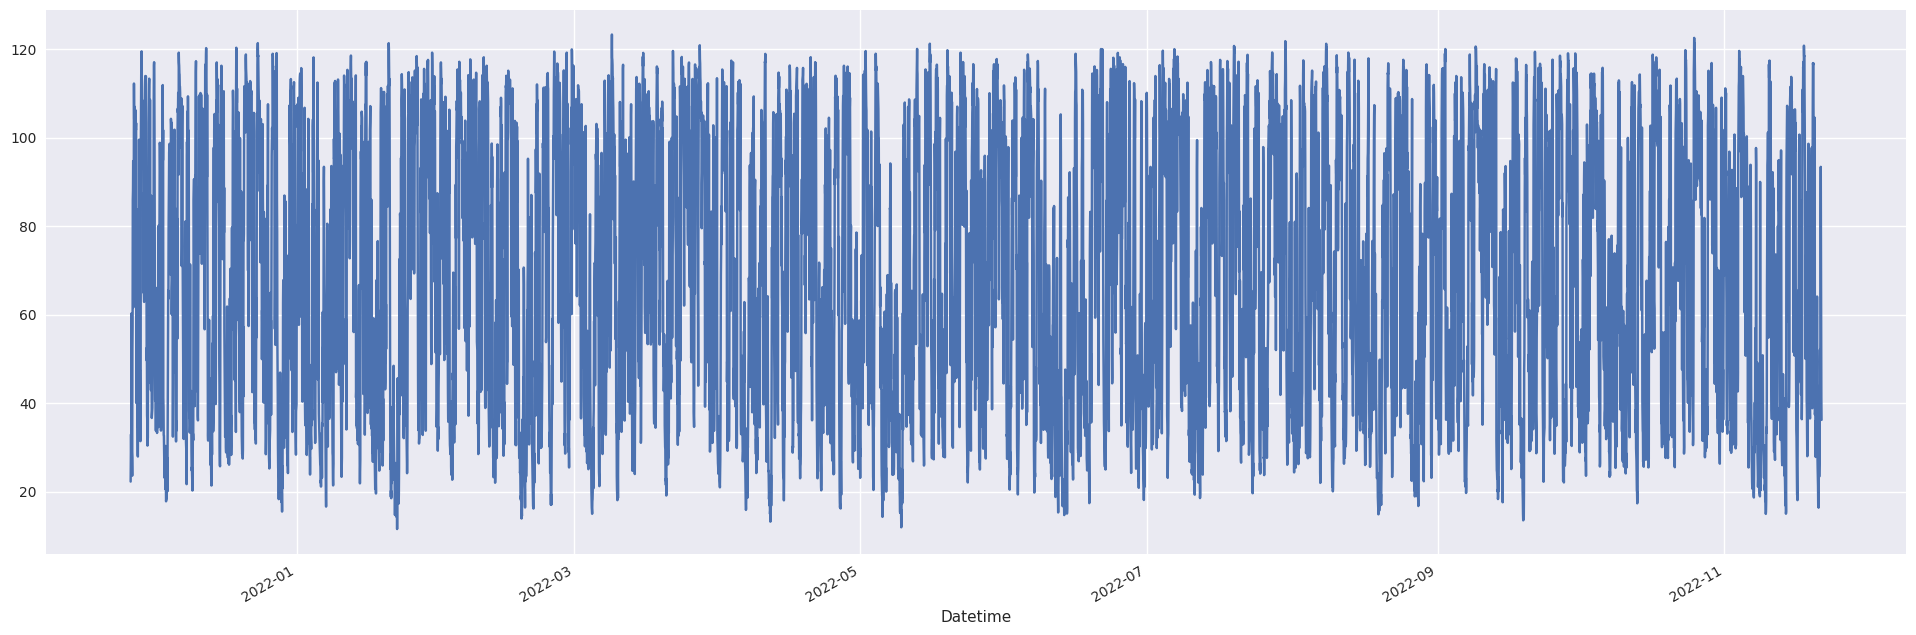

In [67]:
ext_df.kz_score.plot(figsize=(24,8))

In [68]:
ext_df.shape, df.shape

((8629, 128), (8631, 220))

In [69]:
df.index, ext_df.index

(DatetimeIndex(['2021-11-26 14:00:00+00:00', '2021-11-26 15:00:00+00:00',
                '2021-11-26 16:00:00+00:00', '2021-11-26 17:00:00+00:00',
                '2021-11-26 18:00:00+00:00', '2021-11-26 19:00:00+00:00',
                '2021-11-26 20:00:00+00:00', '2021-11-26 21:00:00+00:00',
                '2021-11-26 22:00:00+00:00', '2021-11-26 23:00:00+00:00',
                ...
                '2022-11-21 10:00:00+00:00', '2022-11-21 11:00:00+00:00',
                '2022-11-21 12:00:00+00:00', '2022-11-21 13:00:00+00:00',
                '2022-11-21 14:00:00+00:00', '2022-11-21 15:00:00+00:00',
                '2022-11-21 16:00:00+00:00', '2022-11-21 17:00:00+00:00',
                '2022-11-21 18:00:00+00:00', '2022-11-21 19:00:00+00:00'],
               dtype='datetime64[ns, UTC]', name='Datetime', length=8631, freq=None),
 DatetimeIndex(['2021-11-26 15:00:00+00:00', '2021-11-26 16:00:00+00:00',
                '2021-11-26 17:00:00+00:00', '2021-11-26 18:00:00+00:00',
     

<AxesSubplot:>

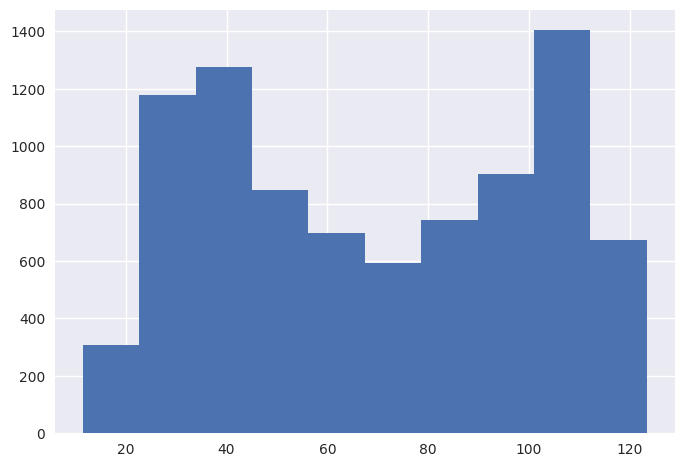

In [70]:
ext_df.kz_score.hist()

Text(0.5, 1.0, 'KZ Index')

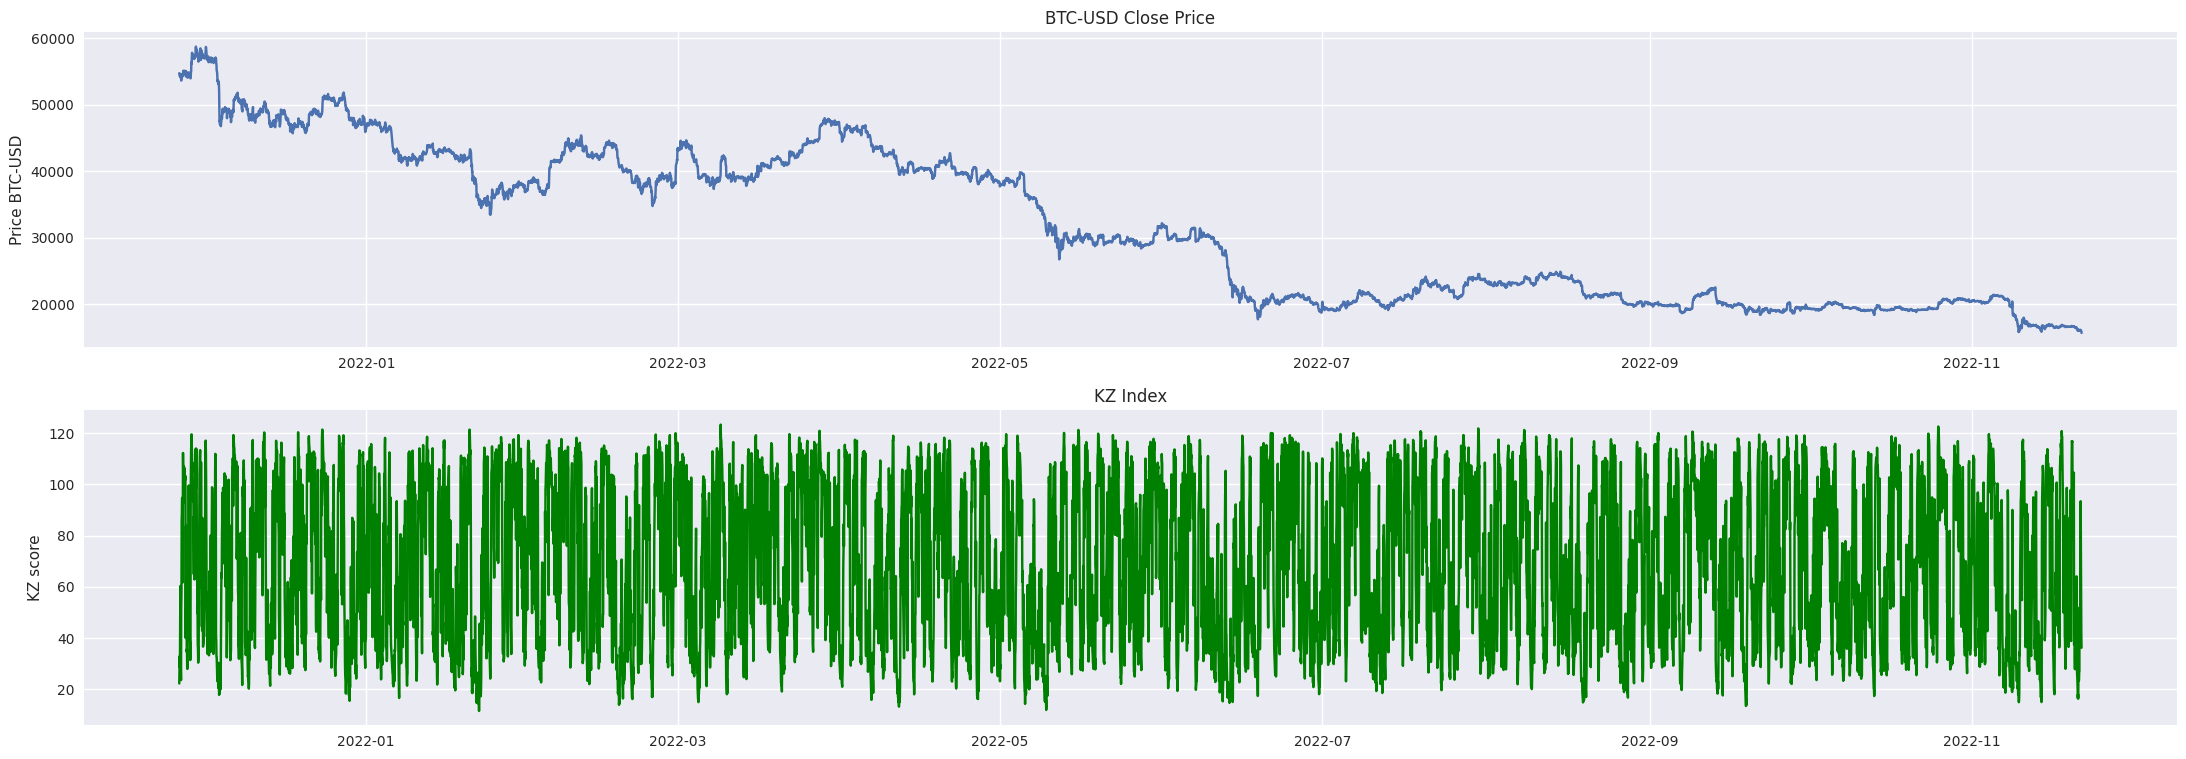

In [71]:
kz = ext_df.kz_score
close = df.close

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(27,9))
ax1.plot(close)
ax1.set_ylabel(f'Price {data.symbol}')
ax1.set_title(f'{data.symbol} Close Price')

ax2.plot(kz, color='green')
ax2.set_ylabel('KZ score')
ax2.set_title('KZ Index')

In [72]:
df.drop(df.index[0], inplace=True)

In [73]:
df['kz_score'] = ext_df.kz_score

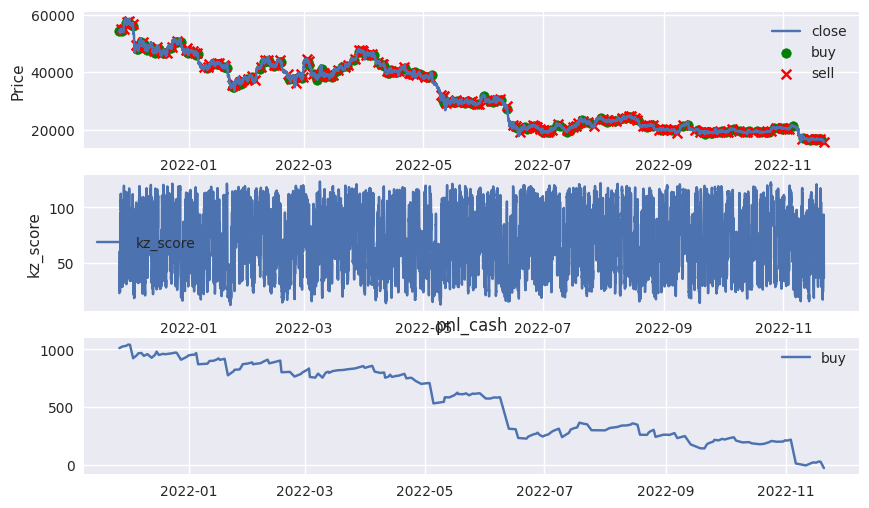

In [74]:
st_kz_score = bt.bt_threshold(df, 'kz_score', 100, 40)
bt.bt_plot_ind(df, st_kz_score, 'kz_score')

In [75]:
st_kz_score

,entry_time,exit_time,entry_price,exit_price,pnl_percent,pnl_cash
0,2021-11-26 15:00:00+00:00,2021-11-27 08:00:00+00:00,54422.6484,55081.0664,0.0121,1011.0982
1,2021-11-28 01:00:00+00:00,2021-11-28 20:00:00+00:00,54222.8633,54986.9336,0.0141,1024.1784
2,2021-11-30 03:00:00+00:00,2021-11-30 11:00:00+00:00,57155.5586,57653.9883,0.0087,1031.8748
3,2021-12-01 03:00:00+00:00,2021-12-01 13:00:00+00:00,57076.7656,57716.5156,0.0112,1042.0515
4,2021-12-02 00:00:00+00:00,2021-12-03 10:00:00+00:00,56955.8633,56946.6758,-0.0002,1040.8482
...,...,...,...,...,...,...
186,2022-11-14 19:00:00+00:00,2022-11-15 01:00:00+00:00,16297.0947,16721.1660,0.0260,18.7742
187,2022-11-16 09:00:00+00:00,2022-11-17 01:00:00+00:00,16728.4180,16693.4648,-0.0021,16.6660
188,2022-11-17 13:00:00+00:00,2022-11-17 16:00:00+00:00,16497.6367,16647.8965,0.0091,25.7573
189,2022-11-18 15:00:00+00:00,2022-11-19 21:00:00+00:00,16687.5645,16670.4668,-0.0010,24.7070


In [76]:
df.kz_score.tail()

Datetime
2022-11-21 15:00:00+00:00   73.1076
2022-11-21 16:00:00+00:00   45.8407
2022-11-21 17:00:00+00:00   41.3814
2022-11-21 18:00:00+00:00   36.2160
2022-11-21 19:00:00+00:00       NaN
Name: kz_score, dtype: float64